In [375]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 10]
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [376]:
dat = np.genfromtxt('hipparchos_subsample.dat')

In [377]:
N = len(dat)

In [378]:
nbins = 100
amin= 0
amax = 1000
num = len(dat)
bin_width = (amax-amin)/nbins



hist =np.histogram(dat,bins = nbins,range = (amin,amax))
print(hist)

(array([ 25,  61, 149, 179, 248, 278, 302, 300, 306, 307, 312, 313, 303,
       337, 328, 278, 283, 290, 243, 230, 214, 215, 243, 210, 226, 215,
       190, 176, 174, 173, 151, 131, 134, 136, 141, 112,  94,  95, 109,
        77,  91,  64,  75,  66,  69,  77,  65,  41,  44,  54,  53,  61,
        38,  39,  47,  33,  31,  36,  36,  34,  33,  32,  28,  33,  41,
        14,  19,  20,  31,  15,  24,  18,  21,  14,  19,  14,  26,   8,
        28,   1,  22,  20,   9,   9,  23,   7,  15,   6,   6,  10,  19,
         8,   8,   6,   6,  11,  10,   5,   9,   8]), array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
        270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
        360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
        450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        540.,  550., 

In [379]:
r = np.arange(0,1000)
#plt.plot(rbins, np.sqrt(rbins)*np.exp(-rbins/150))


In [380]:
rbins=(hist[1][0:-1])
print(np.shape(hist[1]))
func = (np.sqrt(rbins)*np.exp(-rbins/150))
func_better = (np.sqrt(rbins)*np.exp(-rbins/160))
a = func/(np.trapz(func)*bin_width)
a_better = func_better/(np.trapz(func_better)*bin_width)
avg = np.sum(rbins*a)
cumulative_model = np.cumsum(a*bin_width)
cumulative_real = np.cumsum(hist[0]/num)
err = np.sqrt(hist[0])/(N*bin_width)
chisqu = np.sum((((hist[0]/(bin_width*num))-a)/err)**2) 
1-stat.chi2.cdf(chisqu,nbins)

(101,)


0.0

In [381]:
a

array([0.00000000e+00, 1.83211996e-03, 2.42390692e-03, 2.77720925e-03,
       3.00002591e-03, 3.13781292e-03, 3.21561987e-03, 3.24926501e-03,
       3.24958679e-03, 3.22441874e-03, 3.17963462e-03, 3.11975575e-03,
       3.04832950e-03, 2.96817837e-03, 2.88157132e-03, 2.79034575e-03,
       2.69599707e-03, 2.59974600e-03, 2.50259024e-03, 2.40534473e-03,
       2.30867372e-03, 2.21311634e-03, 2.11910742e-03, 2.02699456e-03,
       1.93705219e-03, 1.84949320e-03, 1.76447879e-03, 1.68212663e-03,
       1.60251777e-03, 1.52570255e-03, 1.45170554e-03, 1.38052981e-03,
       1.31216052e-03, 1.24656802e-03, 1.18371051e-03, 1.12353628e-03,
       1.06598567e-03, 1.01099268e-03, 9.58486460e-04, 9.08392463e-04,
       8.60633503e-04, 8.15130636e-04, 7.71803897e-04, 7.30572944e-04,
       6.91357581e-04, 6.54078212e-04, 6.18656209e-04, 5.85014221e-04,
       5.53076426e-04, 5.22768732e-04, 4.94018941e-04, 4.66756872e-04,
       4.40914457e-04, 4.16425808e-04, 3.93227259e-04, 3.71257397e-04,
      

In [382]:
err = np.sqrt(hist[0])/(N*bin_width)
chisqu = np.sum((((hist[0]/(bin_width*num))-a)/err)**2) 
1-stat.chi2.cdf(chisqu,nbins)
def func2(rscale, pvalue):
    newfunc = ((rbins**pvalue)*np.exp(-rbins/rscale))
    a2 = newfunc/(np.trapz(newfunc)*bin_width)
    chisqurd = np.sum((((hist[0]/(bin_width*num))-a2)/err)**2)
    final = 1-stat.chi2.cdf(chisqurd,nbins)
    return(chisqurd)

In [383]:
scale =np.linspace(1,250, 100)
p_value= np.linspace(0,2,100)
chi2 = np.empty((100,100))

#print(chi2)

for k in range(0,len(p_value)):
    for i in range(0,len(scale)):
        chi2[i,k]=(func2(scale[i],p_value[k]))
        #print(scale[i],p_value[k],chi2[i,k])


In [397]:
bin_width_large = (amax-amin)/100000

r_best = np.linspace(0,1000,100000)
r_best_small = np.linspace(0,1000,100)+(bin_width/2)

func_best = (((r_best)**.80808081)*np.exp(-r_best/129.272))
func_best_small = (((r_best_small)**.80808081)*np.exp(-r_best_small/129.272))

a_best = func_best/(np.trapz(func_best)*bin_width_large)
a_best_small = func_best_small/(np.trapz(func_best_small)*bin_width)

best_cumulative_model = np.cumsum(a_best*bin_width_large)
best_data = r_best[np.searchsorted(best_cumulative_model, np.random.random_sample(10000))]
best_hist =np.histogram(best_data,bins = nbins,range = (amin,amax))
err_best = np.sqrt(best_hist[0])/(N*bin_width)
abc = (best_hist[0]/(bin_width*num))
chisqu_best = np.sum(((abc-a_best_small)/err_best)**2) 
1-stat.chi2.cdf(chisqu_best,nbins)

0.1809076294828248

In [398]:
best_hist[0]

array([ 60, 147, 180, 218, 242, 260, 276, 300, 297, 315, 283, 324, 322,
       304, 281, 306, 261, 287, 299, 241, 258, 224, 229, 198, 215, 199,
       212, 175, 168, 162, 180, 137, 156, 128, 119, 131, 101,  96,  85,
       109,  93,  80,  81,  74,  48,  79,  68,  63,  69,  54,  44,  48,
        59,  44,  39,  36,  31,  34,  28,  29,  29,  33,  26,  21,  17,
        16,  17,  19,  14,  16,  17,   8,  13,   7,   9,  12,  17,  10,
         9,   8,  13,  10,  11,   3,   6,   7,   1,   5,   6,   3,   3,
         6,   1,   4,   1,   2,   5,   4,   4,   1])

In [399]:
chisqu_best

112.7402789860853

In [386]:
1-stat.chi2.cdf(chisqu_best,nbins)

0.0

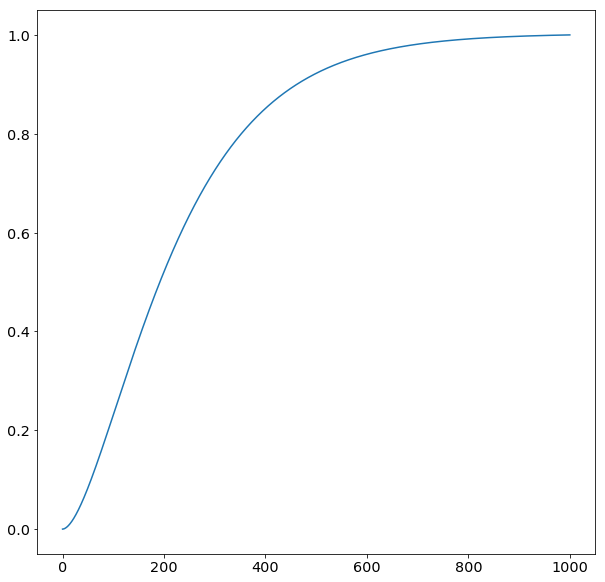

In [371]:
plt.plot(r_best, best_cumulative_model)

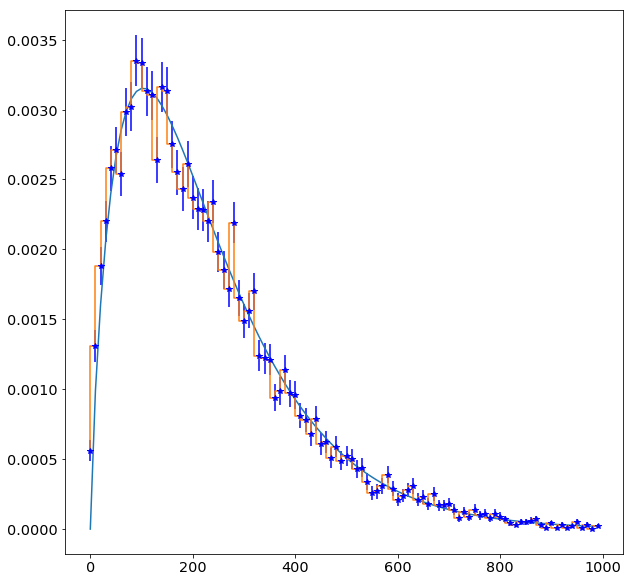

In [367]:
plt.errorbar(rbins, best_hist[0]/(bin_width*num), yerr = err_best, fmt = 'b*')
plt.plot(rbins, a_best_small)

plt.step(rbins, best_hist[0]/(bin_width*num))
#plt.ylim(0,.11)

In [249]:
nstars = 10000
ntrials = 1000
boot_array = np.empty((ntrials, len(rbins)))
for i in range(0, ntrials):

    data = np.random.choice(dat, nstars)
    hist_bootstrap =np.histogram(data,bins = nbins,range = (amin,amax))
    #print(hist_bootstrap[0][i])
    boot_array[i,:] = (hist_bootstrap[0]/(num*bin_width))









In [229]:
#boot_array

In [230]:
chi2df = pd.DataFrame(chi2)

In [231]:
std_boot = []
for i in range(0,nbins):
    std_boot.append(np.std(boot_array[:,i]))

In [232]:
#boot_array[:,i]


In [233]:
#(std_boot)

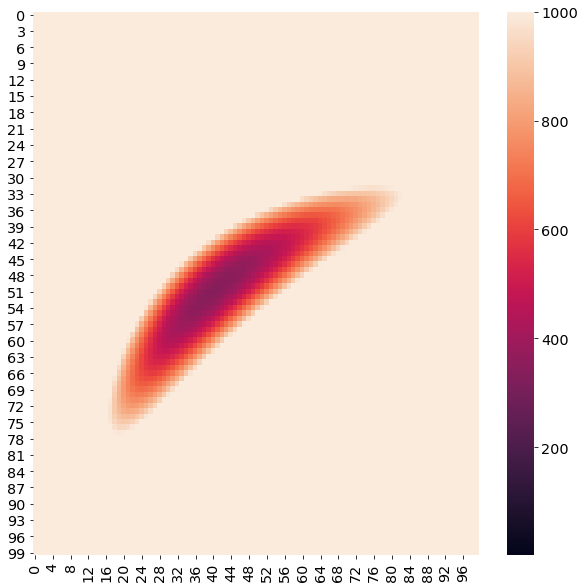

In [234]:
seaborn.heatmap(chi2df, vmin =1, vmax = 1000)


In [235]:
i,j = np.where(chi2==np.min(chi2))

In [236]:
scale[i]



array([129.27272727])

In [452]:
sigma_1 = .1
p_try_1 =.8
r_try_1 = 129
chi2_1 = 50
chi2 = []
p_tries = []
r_tries = []
for i in range(0,10000):
    #print(f'step counter: {i}')
    p_step = np.random.normal(0,sigma)
    r_step =np.random.normal(0,sigma)
    p_try_2 = p_try_1 + p_step
    r_try_2 = r_try_1 + r_step
    
    func_mcmc = (((r_best_small)**p_try_2)*np.exp(-r_best_small/r_try_2))
    a_mcmc = func_mcmc/(np.trapz(func_mcmc)*bin_width)
    err_mcmc = np.sqrt(best_hist[0])/(N*bin_width)
    abc = (best_hist[0]/(bin_width*num))
    chi2_2 = np.sum(((abc-a_mcmc)/err_mcmc)**2) 
    
    p_tries.append(p_try_1)
    r_tries.append(r_try_1)
    
    r_try_1 = r_try_2
    p_try_1 = p_try_2
    
    if chi2_2 < chi2_1:
        chi2.append(chi2_2)
        r_try_1 = r_try_2
        p_try_1 = p_try_2

    elif np.random.random() < np.exp(-(chi2_2-chi2_1)/2):
        chi2.append(chi2_2)
        r_try_1 = r_try_2
        p_try_1 = p_try_2
        
    else:
        chi2.append(chi2_2)
        r_try_1 = r_try_1
        p_try_1 = p_try_1       
    #if np.sqrt(np.abs(chi2_2**2 - chi2_1**2)) <10:
        #print(f'chi2 = {chi2_2}')
        #break
   
    chi2_1 = chi2_2


        
            
        

        

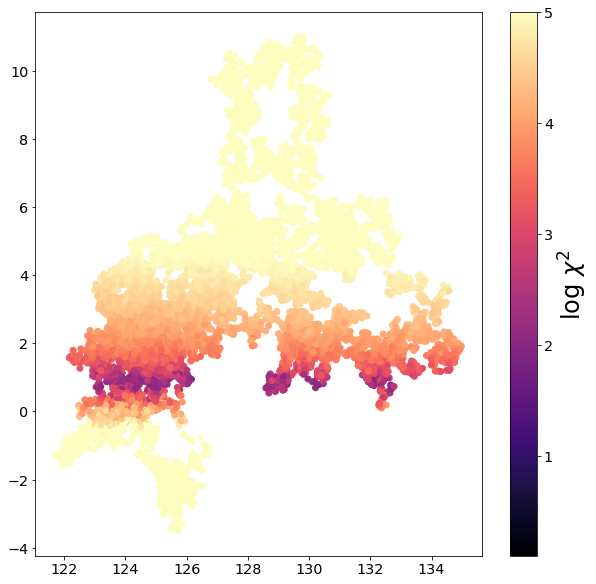

In [453]:
plt.scatter(r_tries, p_tries, c = np.log10(chi2), vmin=.1, vmax=5, cmap = 'magma')
#plt.ylim(0,5)
plt.colorbar().set_label('log ${\chi}^2$', fontsize =24)


In [454]:
ch2df = pd.DataFrame(chi2)

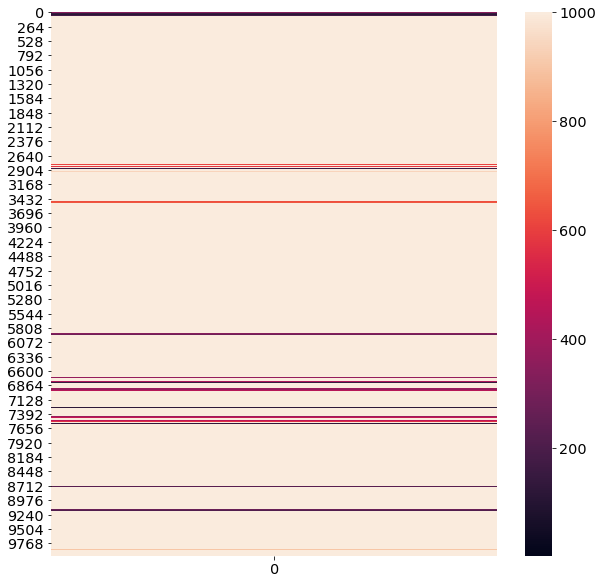

In [455]:

seaborn.heatmap(np.array(ch2df), vmin =1, vmax = 1000)


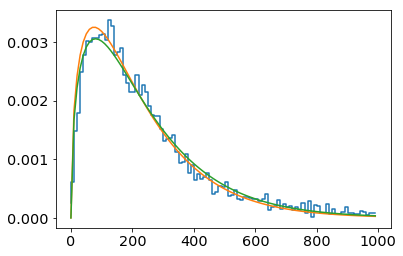

In [119]:
plt.step(rbins, hist[0]/(bin_width*num))
plt.plot(rbins, a)
plt.plot(rbins, a_better)



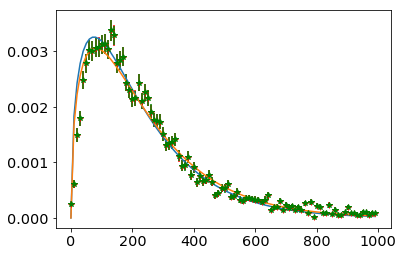

In [120]:
plt.errorbar(rbins, hist[0]/(bin_width*num), yerr = err, fmt = 'r+')
plt.errorbar(rbins, hist[0]/(bin_width*num), yerr = np.array(std_boot) , fmt = 'g*')

plt.plot(rbins, a)
plt.plot(rbins, a_better)


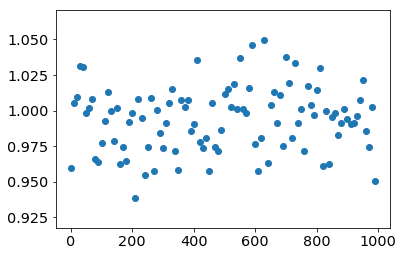

In [121]:
plt.scatter(rbins,(np.array(std_boot)/err))


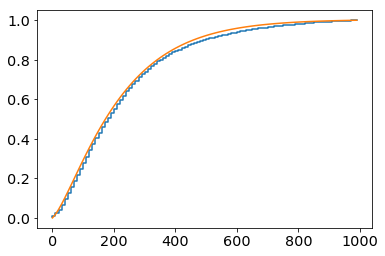

In [46]:
plt.step(rbins, cumulative_real)
plt.plot(rbins, cumulative_model)

In [37]:
np.std(dat), np.std(func)

(188.69960245271267, 1.7345237208654927)

In [ ]:
stat.skew(dat), stat.skew(func)

In [ ]:
stat.kurtosis(dat)

In [ ]:
np.mean(dat)

In [ ]:
d_sort = np.sort(dat)
median = d_sort[(int(N*.5))]
ninety = d_sort[(int(N*(.84)))]
sixteen = d_sort[(int(N*(.16)))]

In [ ]:
median, ninety, sixteen

In [ ]:
np.trapz(a)*bin_width

In [ ]:
np.sum(a)

In [ ]:
avg

In [ ]:
stdev = np.sqrt(np.sum((rbins-avg)**2*a))

In [ ]:
func

In [ ]:
np.sum((rbins-avg)**3*a)/stdev**3

In [ ]:
np.sum((rbins-avg)**4*a)/stdev**4 - 3

In [ ]:
from scipy import integrate
scipy_func = lambda r: (np.sqrt(r)*np.exp(-r/150))


for i in r:
    b = integrate.quad(scipy_func, 0, i)[0]/integrate.quad(scipy_func, 0, 10000)[0]
    if b[0] > 5:
        print(i, b)
   
        exit
    else:
        continue
    

In [ ]:
rand = np.random.uniform(0,1,1000)

In [ ]:
empty = []
nsize = 1000
for i in range(nsize):
    
    rand = np.random.uniform(0,1,10)
    empty.append(len(np.where(rand<0.1)[0]))

In [ ]:
print(empty)

In [ ]:
nbins2 = 20
amin2= 0
amax2 = 20
num2 = len(dat)
bin_width2 = (amax-amin)/nbins
rbins2=(hist2[1][0:-1])


hist2 =np.histogram(empty,bins = nbins2,range = (amin2,amax2))
print(hist2)

In [ ]:
plt.step(rbins2, hist2[0])


In [ ]:
np.mean(empty)

In [ ]:
np.std(empty)

In [ ]:
ntrials = 1000
ndarts = 100
x_avg = []
y_avg = []
sigma_x = []
sigma_mean = []
for i in range(0, ntrials):
    x_i = []
    y_i = []
   
    for n in range (0,ndarts):
        randx = np.random.random_sample()
        randy = np.random.random_sample()

        x_i.append(randx)
        y_i.append(randy)
    x_avg.append(np.mean(x_i))
    y_avg.append(np.mean(y_i))
    sigma_x.append(np.std(x_i))
    sigma_mean.append(np.std(x_i)/np.sqrt(ndarts))

    

In [ ]:
pltbins = 100
amin= 0
amax = 1
num = len(sigma_mean)
histplt =np.histogram(sigma_mean,bins = pltbins,range = (amin,amax))
xbins=(histplt[1][0:-1])

In [ ]:
pltbins = 100
amin= 0
amax = 1
num = len(sigma_x)
histplt2 =np.histogram(sigma_x,bins = pltbins,range = (amin,amax))
xbins=(histplt[1][0:-1])

In [ ]:
pltbins = 100
amin= 0
amax = 1
num = len(x_avg)
histplt3 =np.histogram(np.array(x_avg)-0.5,bins = pltbins,range = (amin,amax))
xbins=(histplt[1][0:-1])

In [ ]:
fig =plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,2,1)
ax.scatter(x_avg, y_avg)
ax.scatter(.5,.5, marker = '+', linewidth =20)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax2 = fig.add_subplot(1,2,2)
ax2.step(xbins, (histplt[0]/num))
ax2.step(xbins, (histplt2[0]/num))
ax2.step(xbins, (histplt3[0]/num))

#ax2.set_xlim(0,1)